In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import numpy as np

C:\Users\deadl\AppData\Local\Temp\ipykernel_9016\1321507181.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [15]:
p = 0.3

class GraphModel:
  def __init__(self):
    self.graph = list()
    self.nx_graph = nx.Graph()
    self.init_graph()

  def init_graph(self):
    self.graph.append(set())
    self.graph.append(set())
    self.graph.append(set())
    self.nx_graph.add_edge(0, 1)
    self.nx_graph.add_edge(1, 2)

  def get_graph(self):
    return self.graph

  def get_node_count(self):
    return len(self.graph)

  def add_node(self):
    self.graph.append(set())
    return len(self.graph) - 1

  def add_edge(self, vertex1, vertex2):
    if vertex1 != vertex2:
      self.graph[vertex1].add(vertex2)
      self.graph[vertex2].add(vertex1)
      self.nx_graph.add_edge(vertex1, vertex2)

  def add_new_node_by_model(self):
    new_node = self.add_node()

    intermediary_vertex = random.choice(list(range(0, new_node)))

    self.add_edge(new_node, intermediary_vertex)

    for adjacent_vertex in self.graph[intermediary_vertex]:
        if np.round(np.random.uniform(0, 1), 1) < p:
            self.add_edge(new_node, adjacent_vertex)

    return new_node
  

network_8192 = GraphModel()

for i in range(network_8192.get_node_count(), 8192):
  network_8192.add_new_node_by_model()



In [16]:
def create_network(matrix_string):
    matrix_size = int(len(matrix_string)**0.5)
    adjacency_matrix = [list(map(int, matrix_string[i:i+matrix_size])) for i in range(0, len(matrix_string), matrix_size)]

    network = nx.Graph()
    network.add_nodes_from(range(matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            if adjacency_matrix[i][j] == 1:
                network.add_edge(i, j)

    return network

In [17]:
small_network_matrix = '0100110010101000010011110000001011100001101000000011000100101010'

with open('var14.txt', 'r') as file:
    network_256_matrix = file.read()


small_network = create_network(small_network_matrix)
network_256 = create_network(network_256_matrix)
network_8192 = network_8192.nx_graph

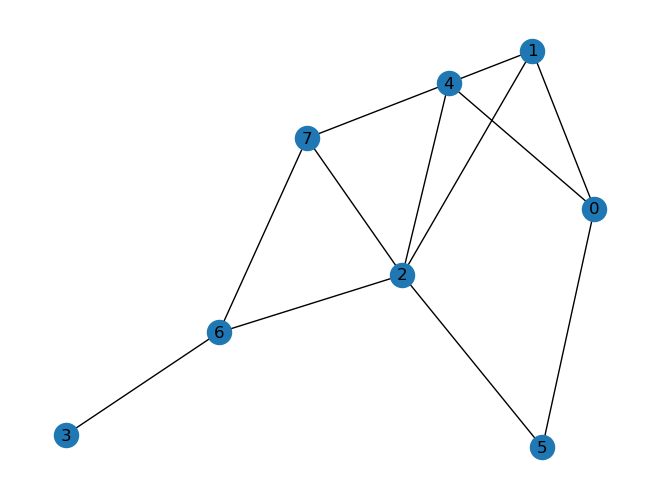

In [18]:
nx.draw(small_network, with_labels=True)
plt.show()

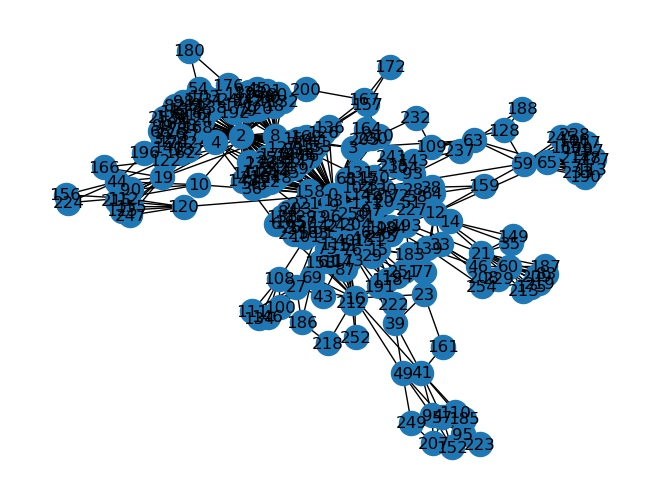

In [19]:
nx.draw(network_256, with_labels=True)
plt.show()

In [20]:
def calculate_freeman(network):
    degree_centrality = nx.degree_centrality(network)
    max_centrality = max(degree_centrality.values())
    freeman_centrality = sum(max_centrality - centrality for centrality in degree_centrality.values())
    star_max_deviation = (network.number_of_nodes() - 1) * (1 - 1/(network.number_of_nodes() - 1))
    return freeman_centrality / star_max_deviation
   

def calculate_network_characteristics(network):
    eigenvector_centrality = nx.eigenvector_centrality(network)
    node_centrality = {node: centrality for node, centrality in eigenvector_centrality.items()}
    network_centrality = sum(node_centrality.values()) / len(node_centrality)
    top_10_nodes = sorted(node_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    eigenvalue = max(nx.adjacency_spectrum(network))

    formatted_top_10 = '\n'.join([f'({a}, {b})' for a, b in top_10_nodes])

    print(f'Eigenvector centrality: {node_centrality}\n')
    print(f'Network centrality: {network_centrality}\n')
    print(f'Top 10 nodes with highest centrality:\n{formatted_top_10}\n')
    print(f'Eigenvalue (λ): {eigenvalue}\n')
    print(f'Freeman: {calculate_freeman(network)}\n')

In [21]:
calculate_network_characteristics(small_network)

Eigenvector centrality: {0: 0.3185467151105605, 1: 0.3790121032359572, 2: 0.5095419723971268, 3: 0.08284067795288583, 4: 0.4626163394322684, 5: 0.24316604824403149, 6: 0.28210696054378076, 7: 0.36831274023484273}

Network centrality: 0.3307679446439317

Top 10 nodes with highest centrality:
(2, 0.5095419723971268)
(4, 0.4626163394322684)
(1, 0.3790121032359572)
(7, 0.36831274023484273)
(0, 0.3185467151105605)
(6, 0.28210696054378076)
(5, 0.24316604824403149)
(3, 0.08284067795288583)

Eigenvalue (λ): (3.4054407728420126+0j)

Freeman: 0.3809523809523809



In [22]:
calculate_network_characteristics(network_256)

Eigenvector centrality: {0: 0.5521657411694489, 1: 0.08178839241487312, 2: 0.39312515216434996, 3: 0.09329447073219704, 4: 0.15054697673076767, 5: 0.07055214453282826, 6: 0.05502347261497348, 7: 0.07055214453282826, 8: 0.10513155543950976, 9: 0.1744693758168853, 10: 0.07297380781945774, 11: 0.06973674983543084, 12: 0.04987940412347277, 13: 0.01674332125380897, 14: 0.04599455442212781, 15: 0.04946001943446465, 16: 0.03451703109709679, 17: 0.04057734144687072, 18: 0.03718777034452245, 19: 0.04180507007109353, 20: 0.06511533159301923, 21: 0.04921454999682308, 22: 0.07055214453282826, 23: 0.006816493156382397, 24: 0.04057734144687072, 25: 0.07055214453282826, 26: 0.05423272004752488, 27: 0.04724317909726044, 28: 0.04493380653262642, 29: 0.04584791559335391, 30: 0.03718777034452245, 31: 0.04057734144687072, 32: 0.04057734144687072, 33: 0.04657384358700841, 34: 0.04057734144687072, 35: 0.007106253270337558, 36: 0.07055214453282826, 37: 0.04057734144687072, 38: 0.04544006542504199, 39: 0.0061

In [23]:
calculate_network_characteristics(network_8192)

Eigenvector centrality: {0: 0.18532608507805928, 1: 0.018555826037325633, 2: 0.0016513066919071132, 3: 0.0018138051872920264, 4: 0.00026155734126492435, 5: 0.3545897811487151, 6: 0.09215916231374001, 7: 0.16336757214890815, 8: 0.005232927330081835, 9: 0.002138489517831054, 10: 0.00015484444865647496, 11: 0.26274294578443835, 12: 0.0003429348448644264, 13: 0.012443682147315897, 14: 0.00017709344977633553, 15: 0.030461072748424828, 16: 0.062303353401738745, 17: 0.0005432200531471162, 18: 8.822849591993001e-05, 19: 0.001442206103992375, 20: 0.0009541994183025354, 21: 5.761347251118673e-05, 22: 0.03135501168070844, 23: 0.0015039063743691808, 24: 0.0015887852896410688, 25: 2.3832157033150458e-05, 26: 6.141988351156445e-05, 27: 0.0030757246241099943, 28: 0.004184663424698324, 29: 0.0014638917057682285, 30: 0.00022842555637062997, 31: 8.124841399734474e-05, 32: 0.00022105634732496248, 33: 6.665520903794753e-05, 34: 0.0005920803569887773, 35: 2.1351892636671382e-05, 36: 0.001211750392077545, 3